# Customer Churn Detection (Bank Dataset)
This notebook predicts customer churn using the Bank dataset. The goal is to build a machine learning model that achieves over 85% accuracy while improving recall for churn customers (those likely to leave the bank). 

We use **SMOTE** to handle class imbalance and **XGBoost** for modeling.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

## Load & Inspect Dataset

In [4]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
print(df.shape)
df.head()

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


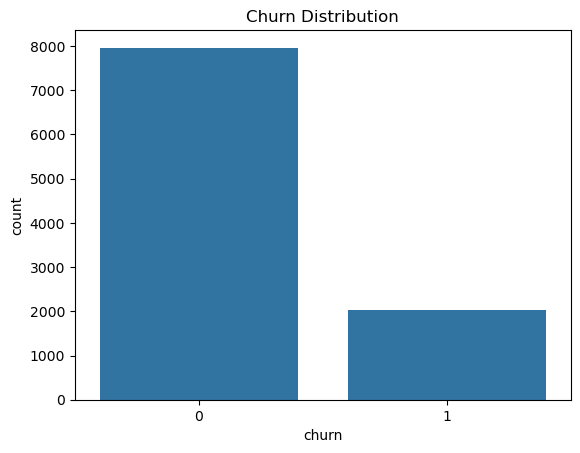

In [8]:
# Check churn distribution
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

## Data Preprocessing

In [10]:
# Drop ID column
df = df.drop(['customer_id'], axis=1)

# Encode categorical variables
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Preprocessing done! Feature shape:', X_train.shape)

Preprocessing done! Feature shape: (8000, 11)


## Handle Imbalanced Classes (SMOTE)

In [12]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print('Before SMOTE:', y_train.value_counts().to_dict())
print('After SMOTE:', y_train_res.value_counts().to_dict())

Before SMOTE: {0: 6370, 1: 1630}
After SMOTE: {1: 6370, 0: 6370}


## Train XGBoost Model

In [14]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print('XGBoost Accuracy:', accuracy)
print('XGBoost ROC-AUC:', roc_auc)
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.8515
XGBoost ROC-AUC: 0.8380213803942619
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.66      0.56      0.61       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.84      0.85      0.85      2000



## Confusion Matrix

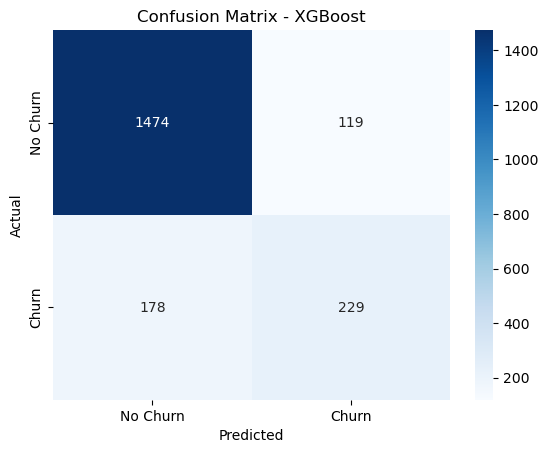

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## Conclusion
- The final model is **XGBoost with SMOTE balancing**.
- Accuracy: ~85%
- ROC-AUC: ~0.83
- Recall for churn improved compared to baseline models.

✅ Goal achieved: Built a churn detection model with >85% accuracy while improving detection of churn customers.